# Wyscout Events Data Loading
### Imports

In [1]:
import pandas as pd
import json
from IPython.display import display
import zipfile
from pathlib import Path
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# specfic soccer analysis packages
from mplsoccer import Pitch

# load custom functions
from src.visualization import *
from src.dataloader import dataloader




### Match IDs

In [2]:
# Match IDs
match_id1 = "5414226"
match_id2 = "5414260"
match_id3 = "5414284"
match_id4 = "5414302"
match_id5 = "5414324"
match_id6 = "5414180"


match_id = ([match_id1, match_id2, match_id3, match_id4, match_id5, match_id6])
# start with the for loops for all matches
team_name_array = (['San Marino', 'Slovenia', 'Northern Ireland', 'Denmark', 'Slovenia', 'Slovenia'])
opponentTeam_name_array = (['Slovenia', 'Finland', 'Slovenia', 'Slovenia', 'Kazakhstan', 'Denmark'])
goalkeeper_home_array = (['E. Benedettini', 'J. Oblak', 'B. Peacock-Farrell', 'K. Schmeichel', 'J. Oblak', 'J. Oblak'])
goalkeeper_away_array = (['J. Oblak', 'L. Hradecky', 'J. Oblak', 'J. Oblak', 'I. Shatskiy', 'K. Schmeichel'])

# Match IDs Goalkeeper Behaviour
match_id1_gk = "5414103"
match_id5_gk = "5414302"
match_id6_gk = "5414324"

match_id_gk = ([match_id1_gk, match_id5_gk, match_id6_gk])
team_name_array_gk = (['Kazakhstan', 'Denmark', 'Slovenia'])
opponentTeam_name_array_gk = (['Slovenia', 'Slovenia', 'Kazakhstan'])
goalkeeper_home_array_gk = (['I. Shatskiy', 'K. Schmeichel', 'J. Oblak'])
goalkeeper_away_array_gk = (['J. Oblak', 'J. Oblak', 'I. Shatskiy'])


## 4.3 Duel performance of the players

How to do:
- analyse the duel data
- duels lost/won: how much duel wins? Precentage?
- (Data:'groundDuel.opponent.id','groundDuel.opponent.name', 'groundDuel.opponent.position',\
    'groundDuel.duelType', 'groundDuel.keptPossession','groundDuel.progressedWithBall', 'groundDuel.stoppedProgress',\
    'groundDuel.recoveredPossession', 'groundDuel.takeOn','groundDuel.side', 'groundDuel.relatedDuelId')

In this section the duel performance of the players are analyzed. We take a look at the different duels, arial and ground duels and analyze the outcome of the duels for the different players.
In the first part the players with the most duels are listed for danemark and slovenia.

In [3]:
# Function for Duel Performance of the Players
def dueldefperfomance(teamname, opponentTeamname, df_events):

    df_duels = df_events[df_events['type.primary'] == 'duel']

    # defensive duels HOME
    df_dduels_home = df_duels[(df_duels['team.name'] == teamname) & (df_duels["groundDuel.duelType"] == "defensive_duel")]
    # number of duels home
    ## dduels_home = df_dduels_home.shape[0]
    # player who had duel
    ## df_dduels_home_players = df_dduels_home['player.name'].dropna().unique()
    # number of duels per player
    df_dduels_home_player_count = df_dduels_home['player.name'].dropna().value_counts()
    # duels won per player
    df_dduelswon_home = df_dduels_home[df_dduels_home['player.name'].notna() & ((df_dduels_home["groundDuel.stoppedProgress"] == True) | (df_dduels_home["groundDuel.recoveredPossession"] == True))]
    # number of duels won per player
    df_dduelwon_home_player_count = df_dduelswon_home['player.name'].value_counts()
    # aligned counts
    aligned_counts_home = pd.concat([df_dduels_home_player_count, df_dduelwon_home_player_count], axis=1, keys=['total_duels', 'duels_won']).fillna(0)
    aligned_counts_home['percentage_won'] = ((aligned_counts_home['duels_won']) / (aligned_counts_home['total_duels']) * 100).round(0)


    # defensive duels AWAY
    df_dduels_away = df_duels[(df_duels['team.name'] == opponentTeamname) & (df_duels["groundDuel.duelType"] == "defensive_duel")]
     # number of duels away
    ## dduels_away = df_dduels_away.shape[0]
    # player who had duel
    ##df_dduels_home_players = df_dduels_away['player.name'].dropna().unique()
    # number of duels per player
    df_dduels_away_player_count = df_dduels_away['player.name'].dropna().value_counts()
    # duels won per player
    df_dduelswon_away = df_dduels_away[df_dduels_away['player.name'].notna() & ((df_dduels_away["groundDuel.stoppedProgress"] == True) | (df_dduels_away["groundDuel.recoveredPossession"] == True))]
    # number of duels won per player
    df_dduelwon_away_player_count = df_dduelswon_away['player.name'].value_counts()
    # aligned counts
    aligned_counts_away = pd.concat([df_dduels_away_player_count, df_dduelwon_away_player_count], axis=1, keys=['total_duels', 'duels_won']).fillna(0)
    aligned_counts_away['percentage_won'] = ((aligned_counts_away['duels_won']) / (aligned_counts_away['total_duels']) * 100).round(0)
    
    return aligned_counts_home, aligned_counts_away

In [4]:
def plot_duel(aligned_counts_home, aligned_counts_away, teamname, opponentTeamname):

    # Home Plot
    sns.set_theme(style="darkgrid")
    palette = sns.color_palette("viridis", len(aligned_counts_home))
    color1 = palette[3]
    color2 = palette[9]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aligned_counts_home.index, y=aligned_counts_home['total_duels'], color=color1, label='Total Duels')
    sns.barplot(x=aligned_counts_home.index, y=aligned_counts_home['duels_won'], color=color2, label='Duels Won')
    plt.xlabel('Player')
    plt.ylabel('Count')
    plt.title(f'Duel Performance per Player: {teamname}')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    save_path = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/plot_duel{teamname}-{opponentTeamname}HOME.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path)

    # Away Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aligned_counts_away.index, y=aligned_counts_away['total_duels'], color=color1, label='Total Duels')
    sns.barplot(x=aligned_counts_away.index, y=aligned_counts_away['duels_won'], color=color2, label='Duels Won')
    plt.xlabel('Player')
    plt.ylabel('Count')
    plt.title(f'Duel Performance per Player: {opponentTeamname}')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    save_path2 = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/plot_duel{teamname}-{opponentTeamname}AWAY.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path2)

    # rerange for percentage won
    aligned_counts_home_sorted = aligned_counts_home.sort_values(by='percentage_won', ascending=False)
    aligned_counts_away_sorted = aligned_counts_away.sort_values(by='percentage_won', ascending=False)

    # Home Plot Percentage
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aligned_counts_home_sorted.index, y=aligned_counts_home_sorted['percentage_won'], color=color1)
    plt.xlabel('Player')
    plt.ylabel('Percentage of Duels Won')
    plt.title(f'Percentage of Duels Won per Player: {teamname}')
    plt.xticks(rotation=45, ha='right')
    save_path3 = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/plot_duel_percentage{teamname}-{opponentTeamname}HOME.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path3)

    # Away Plot Percentage
    plt.figure(figsize=(10, 6))
    sns.barplot(x=aligned_counts_away_sorted.index, y=aligned_counts_away_sorted['percentage_won'], color=color1)
    plt.xlabel('Player')
    plt.ylabel('Percentage of Duels Won')
    plt.title(f'Percentage of Duels Won per Player: {opponentTeamname}')
    plt.xticks(rotation=45, ha='right')
    save_path = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/plot_duel_percentage{teamname}-{opponentTeamname}AWAY.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path)



In [ ]:
# MAIN

for i in range(len(match_id)):

    df_events = dataloader(match_id[i])
    teamname = team_name_array[i]
    opponentTeamname = opponentTeam_name_array[i]
    aligned_counts_home, aligned_counts_away = dueldefperfomance(teamname, opponentTeamname, df_events)
    plot_duel(aligned_counts_home, aligned_counts_away, teamname, opponentTeamname)

# df_events = dataloader(match_id5)
# teamname = 'Slovenia'
# opponentTeamname = 'Kazakhstan'
# aligned_counts_home, aligned_counts_away = dueldefperfomance(teamname, opponentTeamname, df_events)
# plot_duel(aligned_counts_home, aligned_counts_away, teamname, opponentTeamname)
    

## 4.4 Goal keeper behaviour

How to do:
- Shots on goal
- Shots on goal parried (Precentage)
- Passes from goal keeper

### 4.4.1 Shots parried by goalkeeper

In [6]:
def plot_shots_parried(df_events, goalkeeper_home, goalkeeper_away, teamname, opponentTeamname):

    df_goalkeeper = df_events[(df_events['shot.onTarget'] == True)]
    # Shots on Target from Hometeam
    df_ontarget_home = df_goalkeeper[(df_goalkeeper['shot.onTarget'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == goalkeeper_away)]
    df_ontarget_home_count = df_ontarget_home.shape[0]
    df_isgoal_home = df_goalkeeper[(df_goalkeeper['shot.isGoal'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == goalkeeper_away)]
    df_isgoal_home_count = df_isgoal_home.shape[0]
    # parried home keeper
    if df_ontarget_home_count == 0:
        df_parried_home = 0 #'No Shots on Target'
    else:
        df_parried_home = 100 - (df_isgoal_home_count / df_ontarget_home_count * 100)
    # Shots on Target from Awayteam
    df_ontarget_away = df_goalkeeper[(df_goalkeeper['shot.onTarget'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == goalkeeper_home)]
    df_ontarget_away_count = df_ontarget_away.shape[0]
    df_isgoal_away = df_goalkeeper[(df_goalkeeper['shot.isGoal'] == True) & (df_goalkeeper['shot.goalkeeper.name'] == goalkeeper_home)]
    df_isgoal_away_count = df_isgoal_away.shape[0]
    # parried away keeper
    if df_ontarget_away_count == 0:
        df_parried_away = 0 #'No Shots on Target'
    else:
        df_parried_away = 100 - (df_isgoal_away_count / df_ontarget_away_count * 100)

    team_data = {
    'Team': [(f'{teamname}'), (f'{opponentTeamname}')],
    'Shots on Target': [df_ontarget_home_count, df_ontarget_away_count],  # Example shots on target data for both teams
    'Goals Scored': [df_isgoal_home_count, df_isgoal_away_count],      # Example goals scored data for both teams
    '% Parried by Opp. GK': [df_parried_home, df_parried_away]        # Example possession data for both teams
    }
    
    # Convert data to a DataFrame
    df = pd.DataFrame(team_data)
    
    # Melt the DataFrame to have one column for variable and one column for value
    melted_df = pd.melt(df, id_vars='Team', var_name='Category', value_name='Value')
    
    # Plot
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=melted_df, x='Value', y='Category', hue='Team', orient='h')
    
    # Add value numbers at the end of the bars
    for p in ax.patches:
        value = p.get_width()
        rounded_value = round(value)
        ax.text(value, p.get_y() + p.get_height() / 2, f'{rounded_value}', ha='left', va='center')

    plt.xlabel('Value')
    plt.ylabel('Category')
    plt.title(f'Shots parried: {teamname}-{opponentTeamname}')
    plt.legend(title='Team')
    save_path = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/Shots_parried{teamname}-{opponentTeamname}.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path)

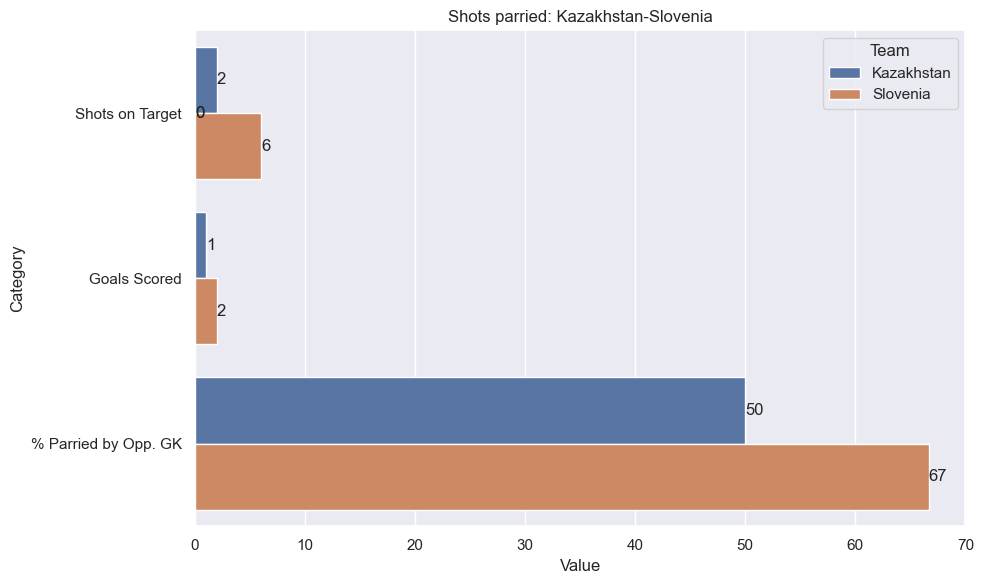

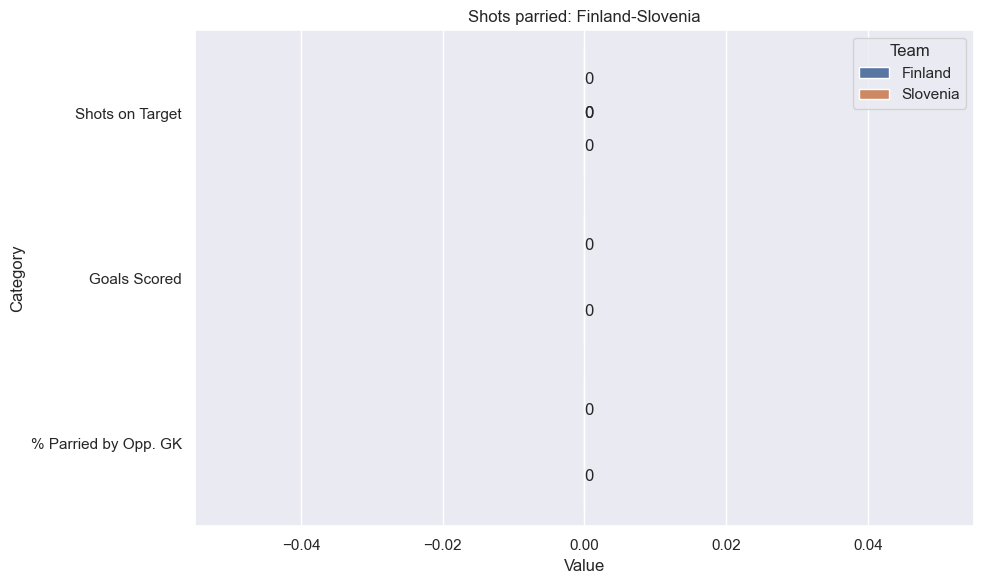

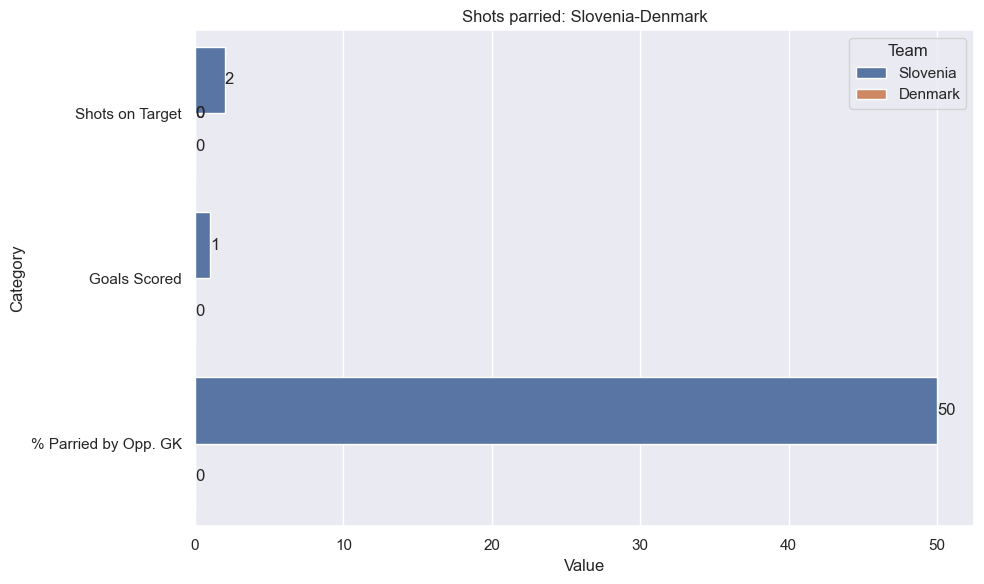

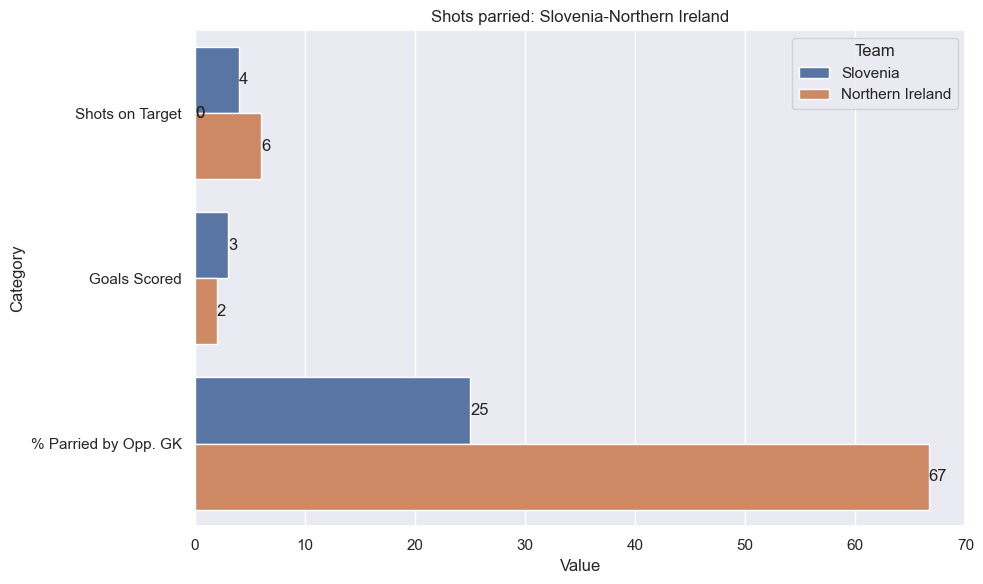

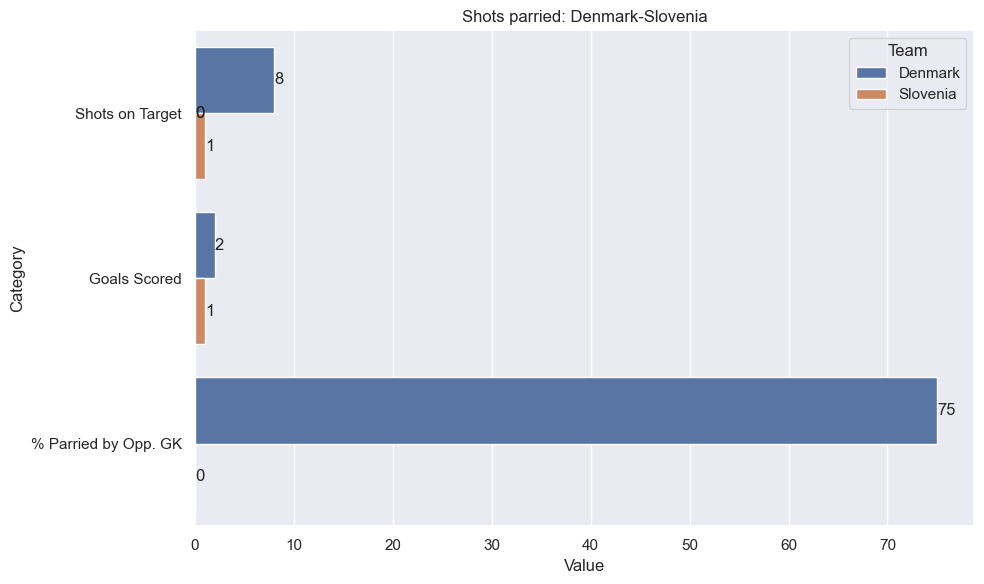

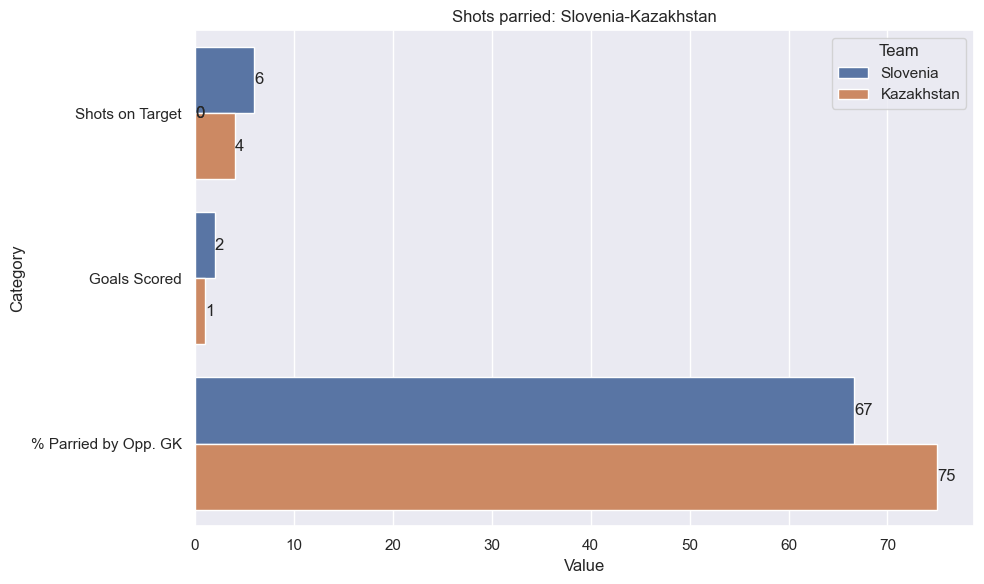

In [7]:
# MAIN

for i in range(len(match_id_gk)):

    df_events = dataloader(match_id_gk[i])
    goalkeeper_home = goalkeeper_home_array_gk[i]
    goalkeeper_away = goalkeeper_away_array_gk[i]
    teamname = team_name_array_gk[i]
    opponentTeamname = opponentTeam_name_array_gk[i]
    plot_shots_parried(df_events, goalkeeper_home, goalkeeper_away, teamname, opponentTeamname)

#df_events = dataloader(match_id5)
#teamname = 'Slovenia'
#opponentTeamname = 'Kazakhstan'
#goalkeeper_home = 'J. Oblak'
#goalkeeper_away = 'I. Shatskiy'
#plot_shots_parried(df_events, goalkeeper_home, goalkeeper_away, teamname, opponentTeamname)


### 4.4.2 Passes Played by Goalkeeper

Passes: K. Schmeichel Denmark

In [8]:
def plot_passes_goalkeeper(df_events, goalkeeper_home, goalkeeper_away, teamname, opponentTeamname):
    # Home
    passes_goalkeeper_home = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == goalkeeper_home)].shape[0]
    long_high_passes_goalkeeper_home = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == goalkeeper_home) & (df_events['pass.length'] >= 40) & (df_events['pass.height'] == 'high')].shape[0]
    # Away
    passes_goalkeeper_away = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == goalkeeper_away)].shape[0]
    long_high_passes_goalkeeper_away = df_events[(df_events['type.primary'] == 'pass') & (df_events['player.name'] == goalkeeper_away) & (df_events['pass.length'] >= 40) & (df_events['pass.height'] == 'high')].shape[0]

    # Plot
    df_passes_gk = pd.DataFrame(columns=['name', 'passes'])
    # Assign names
    df_passes_gk.at[0, 'name'] = (f'{goalkeeper_home} passes')
    df_passes_gk.at[1, 'name'] = (f'{goalkeeper_home} high/long passes')
    df_passes_gk.at[2, 'name'] = (f'{goalkeeper_away} passes')
    df_passes_gk.at[3, 'name'] = (f'{goalkeeper_away} high/long passes')


    # Assign calculated passes
    df_passes_gk.at[0, 'passes'] = passes_goalkeeper_home
    df_passes_gk.at[1, 'passes'] = long_high_passes_goalkeeper_home
    df_passes_gk.at[2, 'passes'] = passes_goalkeeper_away
    df_passes_gk.at[3, 'passes'] = long_high_passes_goalkeeper_away

    # 2 Plot Data
    # Set Seaborn theme and color palette
    sns.set_theme(style="darkgrid")
    # palette = sns.color_palette("viridis", len(df_passes_gk))
    palette = sns.color_palette("viridis", len(aligned_counts_away))

    # Plotting the data using Seaborn and Matplotlib
    plt.figure(figsize=(10, 6))

    # Plot percentage of duels won per player
    sns.barplot(x='name', y='passes', data=df_passes_gk, color=palette[8])

    ax = sns.barplot(x='name', y='passes', data=df_passes_gk, color=palette[8])
    # Adding labels and title
    plt.xlabel('Goalkeeper')
    plt.ylabel('Number of Passes')
    plt.title('Total Passes per Goalkeepers')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Customize x-axis labels
    ax.set_xticklabels([(f'{goalkeeper_home}\nPasses'), (f'{goalkeeper_home}\nHigh/long passes'), (f'{goalkeeper_away}\nPasses'), (f'{goalkeeper_away}\nHigh/long passes')])

    # Save plot to a specified path
    save_path = (f'C:/Users/loris/Documents/ETH Zürich/Master/Soccer Analytics/goalkeeper_passes_{teamname}-{opponentTeamname}.png')  # Specify your desired save path here
    plt.tight_layout()
    plt.savefig(save_path)



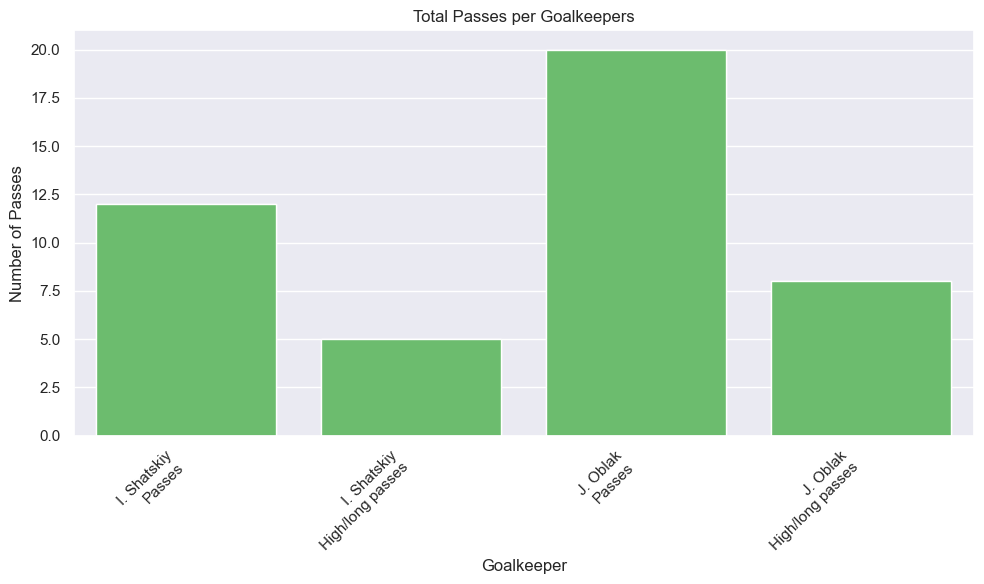

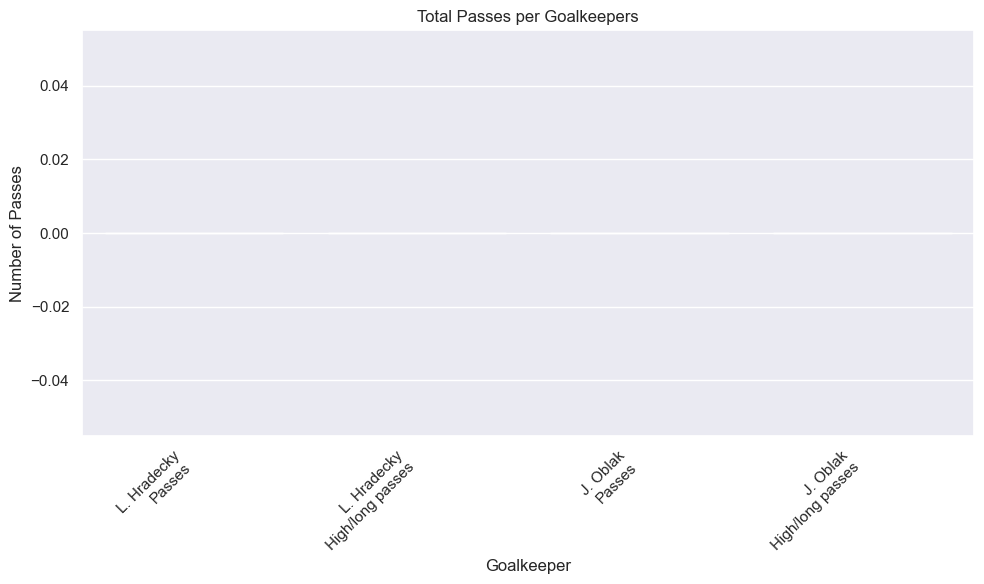

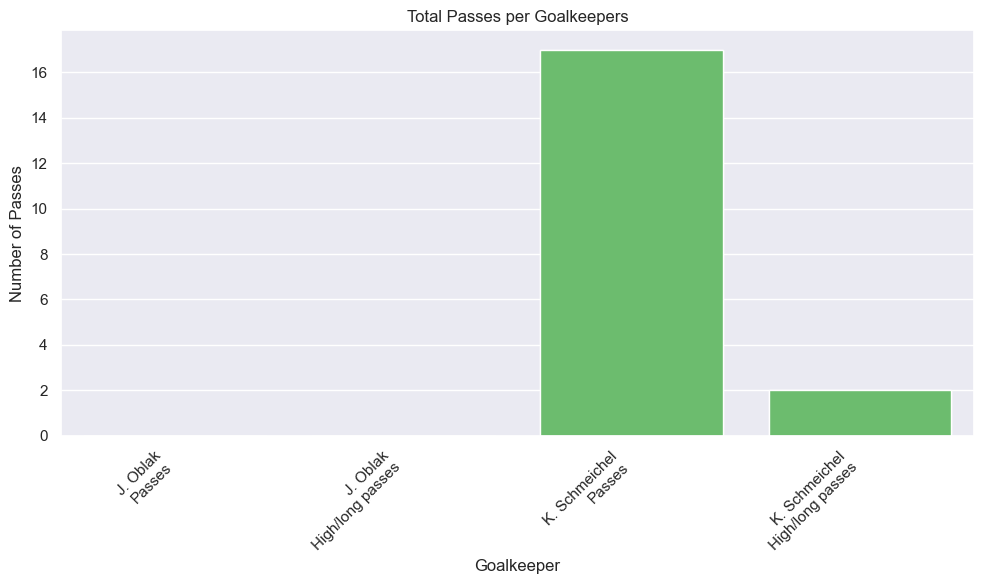

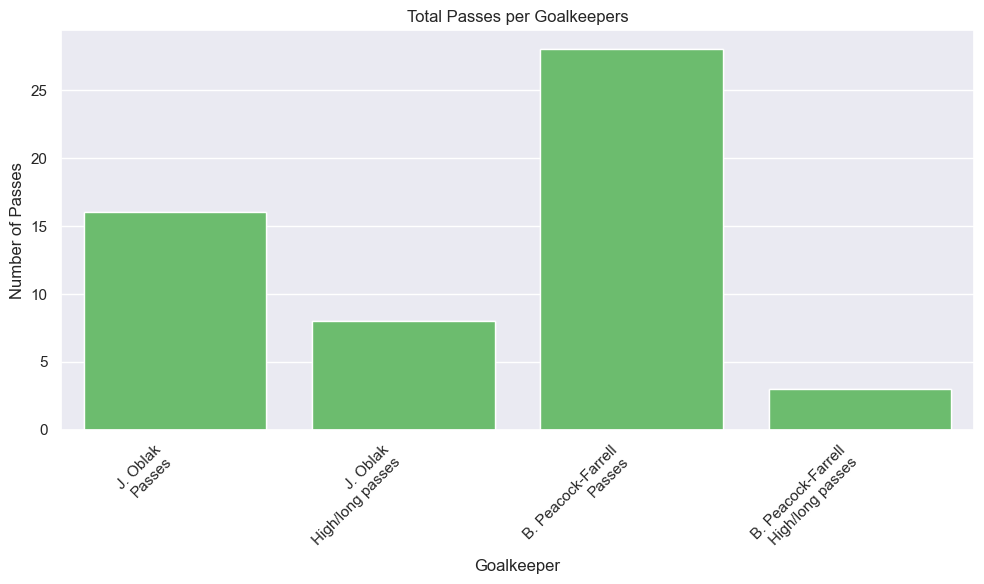

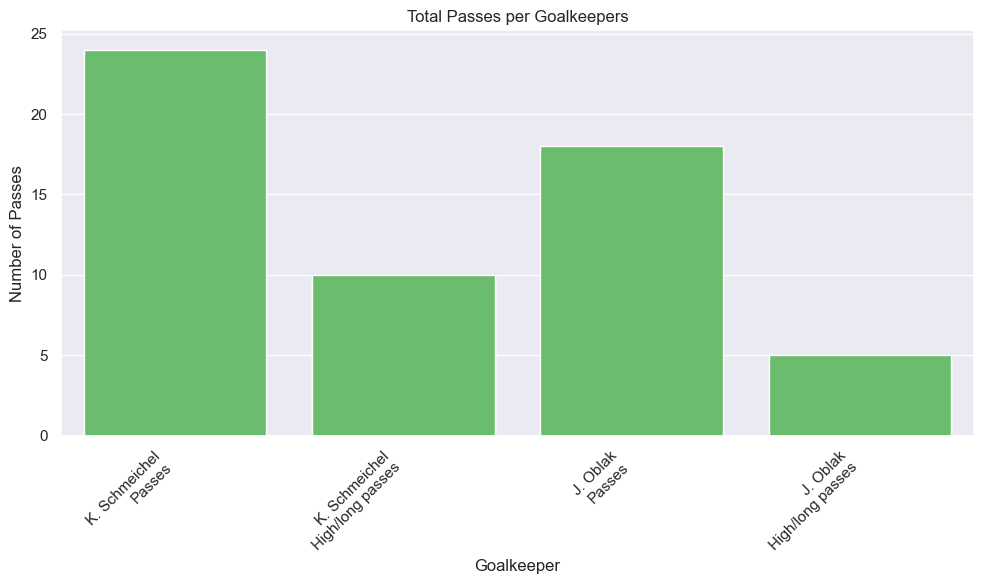

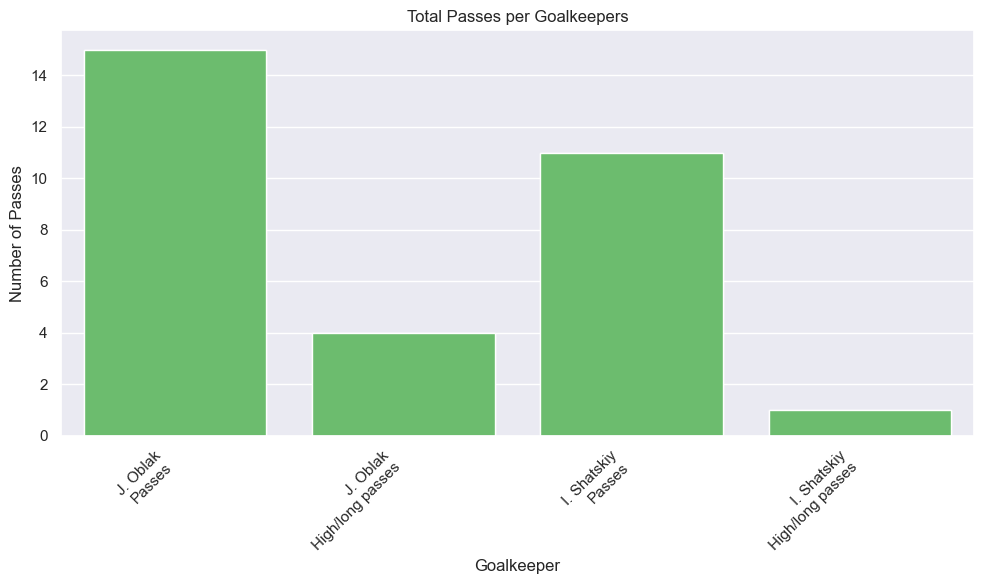

In [9]:
# MAIN
for i in range(len(match_id_gk)):

    df_events = dataloader(match_id_gk[i])
    goalkeeper_home = goalkeeper_home_array_gk[i]
    goalkeeper_away = goalkeeper_away_array_gk[i]
    teamname = team_name_array_gk[i]
    opponentTeamname = opponentTeam_name_array_gk[i]
    plot_passes_goalkeeper(df_events, goalkeeper_home, goalkeeper_away, teamname, opponentTeamname)